In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import sonnet as snt
import numpy as np
from bnn.model_utils import *
import matplotlib.pyplot as plt
from cycler import cycler
from bnn.BNN_MLP import *
from bnn.utils import *
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [3]:
num_task = 3

In [4]:
net = BNN_MLP(n_inputs=784, n_outputs=10, hidden_units=[50, 50],num_task=num_task, init_mu=0.0, init_rho=-3.0, 
              activation=tf.nn.relu, last_activation=tf.nn.softmax)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [5]:
train_task,test_task = construct_permute_mnist(num_tasks=num_task)
train_init,test_init = load_iterator(net,train_task,test_task)

Initialization ... 
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.


In [6]:
sess = tf.InteractiveSession()
sess.run( tf.global_variables_initializer() )

# Conventional Bayesian Neural Network

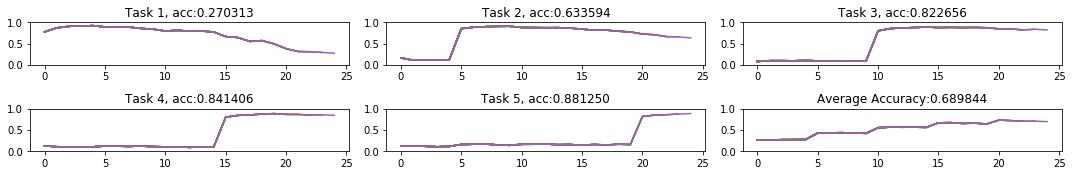

In [7]:
train_permute(net,sess,5,20,train_task,test_task,train_init,train_init,lams=[0.01])

# Bayesian Sequential Inference (Proposed)(To be checked)

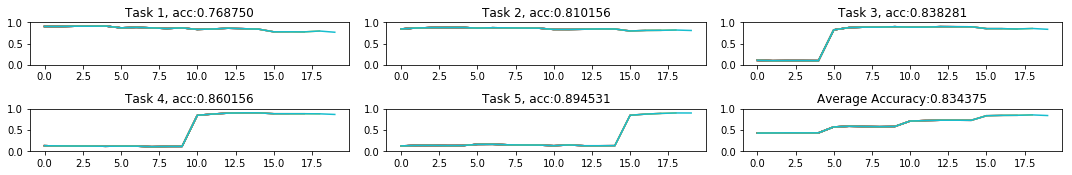

In [8]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],sequential=True)

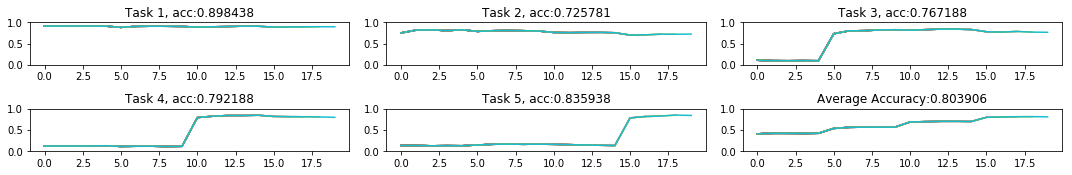

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.1],sequential=True)

# Model Merge -  weight uncertainty (Proposed)

## 1. Without Prior Konwledge

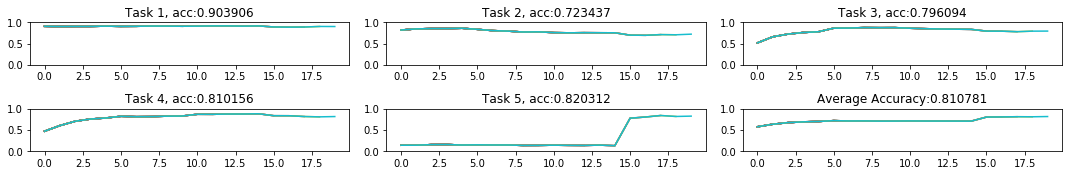

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.1],dist_merge=True)

## 2. With Prior Knowledge

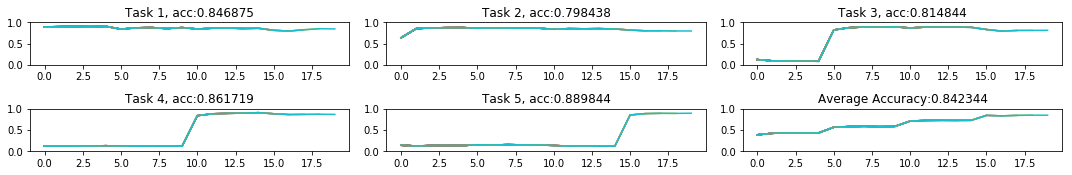

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],sequential=True,dist_merge=True)

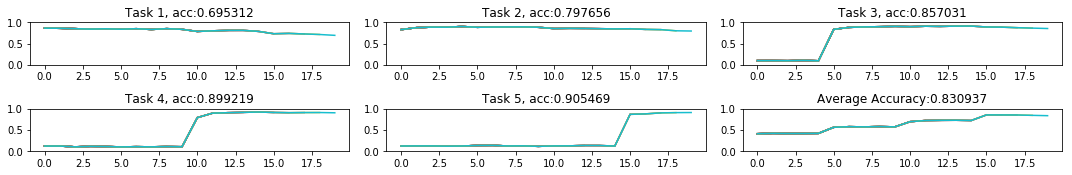

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,dist_merge=True)

# Model Merge - IMM (Extended)

imm_mean best alpha is:0.8421052631578947, best accuracy is 0.8509374999999999


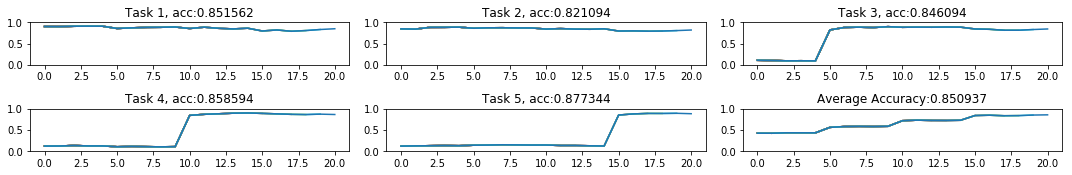

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],sequential=True,imm=True,merge_method=['imm_mean'],method_name='imm_mean')

imm_mean best alpha is:0.6842105263157894, best accuracy is 0.85421875


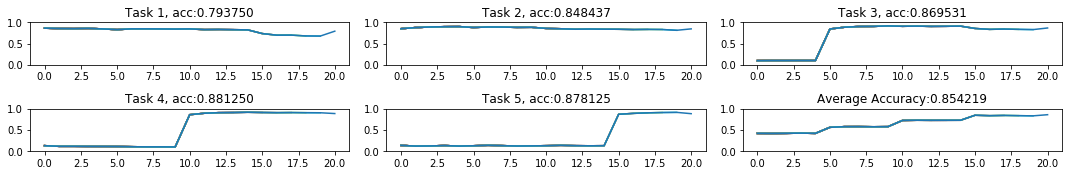

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.001],sequential=True,imm=True,merge_method=['imm_mean'],method_name='imm_mean')

# Model Merge - KL-smooth (Proposed)

Computing Fisher ...


KeyboardInterrupt: 

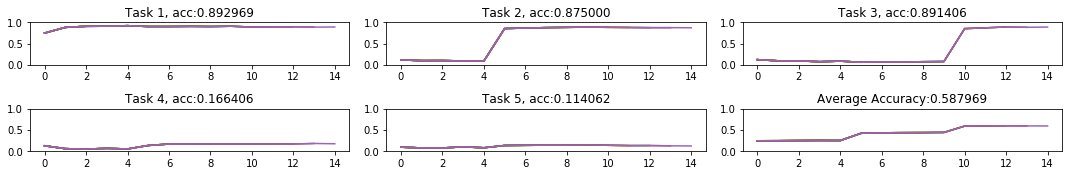

In [7]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],kl=True,sequential=True)

## Model KL Smooth

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.001],kl=True,sequential=True)

  0%|          | 0/20 [00:00<?, ?it/s]

Adam_1 best alpha is:0.0, best accuracy is 0.08515625


# Nodes Sharing (Proposed)

## 1. EM smooth In this method, we have two model. We would like to find the overlap between them.

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],
              sequential=True,stereo=True)

In [ ]:
net.num_params

In [ ]:
#net.merge_var[0][4] == net.merge_var[1][4]

In [ ]:
net.num_params / 42310 /2


In [ ]:
train_permute(net,sess,1,20,train_task,test_task,train_init,test_init,lams=[0.0005],
              sequential=True,set_active_output=None
              ,task_labels=None,st=True)

  0%|          | 0/6 [00:00<?, ?it/s]

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35 0.3 ]
3 [0.35 0.35

In [8]:
net.num_params / 42310 /2


AttributeError: 'BNN_MLP' object has no attribute 'num_params'

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.05],
              sequential=True,set_active_output=set_active_outputs
              ,task_labels=task_labels,stereo=True)

In [ ]:
net.num_params / 42310 /2


## 2. Dirichlet smooth

### Threshold = 0.4

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],
              sequential=True,set_active_output=set_active_outputs
              ,task_labels=task_labels,stereo=True,dp=True)

In [ ]:
train_permute(net,sess,5,20,train_task,test_task,train_init,test_init,lams=[0.01],
              sequential=True,set_active_output=set_active_outputs
              ,task_labels=task_labels,stereo=True,dp=True)

In [ ]:
42310 * 2

In [ ]:
784* 50 + 50*50 + 50*10 + 50 + 50 + 10

In [ ]:
net.F_accum[0] + 10**-10